In [ ]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre: Juan Sebastian Novoa Ortiz

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [ ]:
# a
def jacobi(A, b, tol, max_itter):
  '''
  resuleve un sistema de ecuaciones usando el metodo de jacobi
  entradas:
    - A (np.ndarray): Matriz de coeficientes
    - b (np.array): Vector de valores dependientes
    - tol (float): Tolerancia deseada
    - max_itter (float): Numero maximo de iteraciones
  salidas:
    - x (np.array): Vector de solucion
    - k+1 ó max_itter (float): numero de iteraciones para convergencia
  '''

  #obtenemos el tamaño del sistema
  n = len(b)
  # inicializamos el vector 0
  x = np.zeros(n)

  # bucle principal de ecuaciones
  for k in range(max_itter):
    #creamos una copia del paso anterior
    x_anterior = x.copy()
    #creamos el paso nuevo
    x_nuevo = np.zeros(n)
    sumatoria = 0
    # creamos el ciclo de la sumatoria y actualizacion de paso
    for i in range(n):
      sumatoria = np.dot(A[i, :], x_anterior) - A[i, i] * x_anterior[i]
      x_nuevo[i] = (b[i] - sumatoria) / A[i, i] # actualizamos el x

    # actualizamos el vector solucion
    x = x_nuevo

    if abs(la.norm(x - x_anterior)) < tol:
      return x, k+1 # retornamos el vector solucion y el numero de pasos

  return x, max_itter # en caso de no lograr converger devuelve el ultimo x y el max_itter

In [ ]:
#condiciones y vectores iniciales
A = np.array([
    [10., -1.,  2.,  0.],
    [-2., 11., 0.,  -1.],
    [ 3., -1., 10., -1.],
    [ 0.,  2., -1.,  8.]
])

b = np.array([6., 25., -11., 15.])

tol = 1e-10

solucion_jacobi , iteraciones_jacobi = jacobi(A, b, tol, 100)

# Se imprimen los resultados
print("--- solucion metodo de jacobi ---")
print(f"La solucion aproximada es: {solucion_jacobi}")
print(f"Numero de iteraciones necesarias: {iteraciones_jacobi}")


--- solucion metodo de jacobi ---
La ssolucion aproximada es: [ 1.06736509  2.56693873 -1.05335607  1.10159581]
Numero de iteraciones necesarias: 21


In [ ]:
solucion_np = np.linalg.solve(A, b)
print(solucion_np)

[ 1.06736509  2.56693873 -1.05335607  1.10159581]


In [ ]:
error_inicial = la.norm(solucion_jacobi - solucion_np)
print(f"La norma euclidiana de la diferencia entre ambas soluciones (con tol=1e-10) es: {error_inicial:.2e}")


La norma euclidiana de la diferencia entre ambas soluciones (con tol=1e-10) es: 1.87e-11


In [ ]:
# definimos el set de tolerancias

tolerancias = np.logspace(-18, -1, 18)
errores = []
iteraciones_lista = []

for tol in tolerancias:
    sol, iters = jacobi(A, b, tol=tol, max_itter=2000) # aumentamos max_iter para tolerancias bajas
    error = la.norm(sol - solucion_np)
    errores.append(error)
    iteraciones_lista.append(iters)

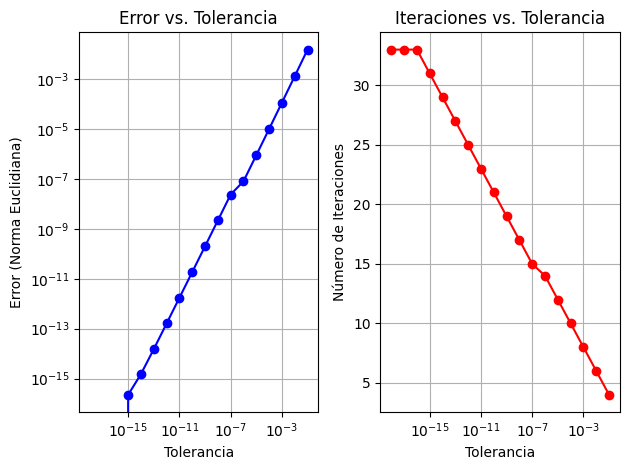

In [ ]:
# 3. Graficar los resultados

# Grafico de Error vs. Tolerancia
plt.figure()

plt.subplot(1, 2, 1)
plt.plot(tolerancias, errores, 'o-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Error vs. Tolerancia')
plt.xlabel('Tolerancia')
plt.ylabel('Error (Norma Euclidiana)')
plt.grid()

# Grafico de Iteraciones vs. Tolerancia
plt.subplot(1, 2, 2)
plt.plot(tolerancias, iteraciones_lista, 'o-', color='r')
plt.xscale('log')
plt.title('Iteraciones vs. Tolerancia')
plt.xlabel('Tolerancia')
plt.ylabel('Numero de Iteraciones')
plt.grid()

plt.tight_layout()
plt.show()

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


In [ ]:
def sistema_masa_resorte(t, z, m, c, k):
    """
    reodenamiento sistema de segundo orden en sistema de primer orden edo

    Args:
        t (float): tiempo actual
        z (list or np.ndarray): el vector de estado [y(t), y'(t)], donde y es la posicion
                                 y y' es la velocidad.
        m (float): la masa del objeto.
        c (float): el coeficiente de friccion (amortiguamiento).
        k (float): la constante del resorte.

    Returns:
        list: La derivada del vector de estado [y'(t), y''(t)].
    """

    # z[0] es la posicion y(t)
    # z[1] es la velocidad y'(t)
    y, v = z[0], z[1]

    # dz1/dt = y'(t) = v
    dydt = v
    # dz2/dt = y''(t) = (-c*v - k*y) / m
    dvdt = (-c * v - k * y) / m

    return [dydt, dvdt]

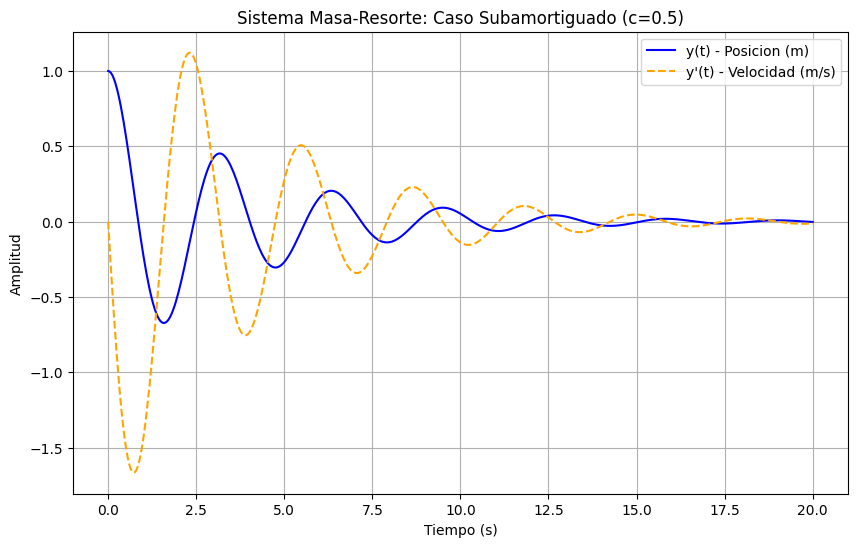

In [ ]:
# parametros caso b
m = 1.0
k = 4.0
c = 0.5
y0 = [1.0, 0.0]
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 500) # Puntos de tiempo para la evaluacion

# Resolver la EDO para el caso subamortiguado
sol_sub = solve_ivp(
    sistema_masa_resorte,
    t_span,
    y0,
    args=(m, c, k),
    dense_output=True,
    t_eval=t_eval
)

# Extraer resultados
t_sub = sol_sub.t
y_sub = sol_sub.y[0] # Posicion
v_sub = sol_sub.y[1] # Velocidad

# Grafico posicion y velocidad
plt.figure(figsize=(10, 6))
plt.plot(t_sub, y_sub, label="y(t) - Posicion (m)", color='blue')
plt.plot(t_sub, v_sub, label="y'(t) - Velocidad (m/s)", color='orange', linestyle='--')
plt.title('Sistema Masa-Resorte: Caso Subamortiguado (c=0.5)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

El primer sistema presenta un regimen subamortiguado, en base a la grafica se puede ver como el coeficiente de friccion hace que la masa se vaya deteniendo conforme pasa el tiempo

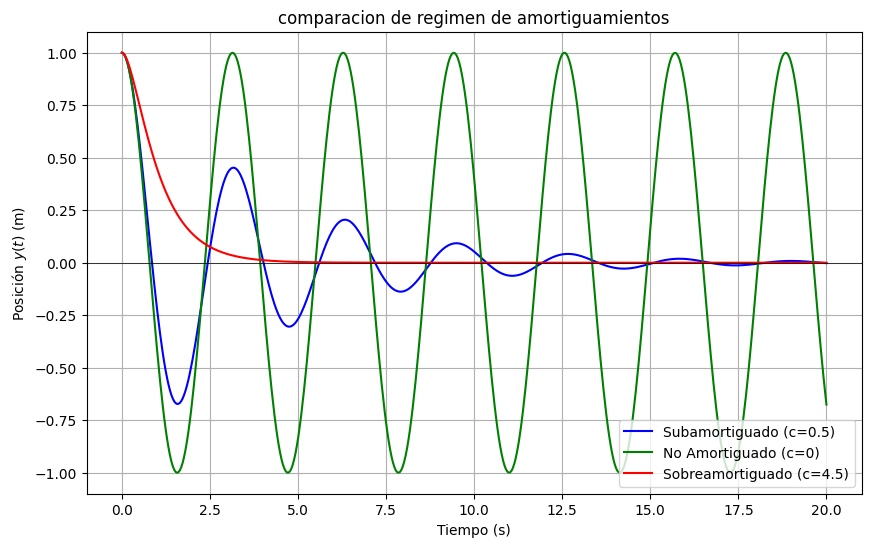

In [ ]:
# Caso 1: Sin friccion (c = 0)
sol_no_amortiguado = solve_ivp(
    sistema_masa_resorte, t_span, y0, args=(m, 0, k), dense_output=True, t_eval=t_eval
)
y_no_amortiguado = sol_no_amortiguado.y[0]

# Caso 2: Fuerte friccion (c = 4.5) - Sobreamortiguado
sol_sobre = solve_ivp(
    sistema_masa_resorte, t_span, y0, args=(m, 4.5, k), dense_output=True, t_eval=t_eval
)
y_sobre = sol_sobre.y[0]

# Grafico los tres casos de y(t) juntos
plt.figure(figsize=(10, 6))
plt.plot(t_sub, y_sub, label=f'Subamortiguado (c=0.5)', color='blue')
plt.plot(sol_no_amortiguado.t, y_no_amortiguado, label=f'No Amortiguado (c=0)', color='green')
plt.plot(sol_sobre.t, y_sobre, label=f'Sobreamortiguado (c=4.5)', color='red')

plt.title('comparacion de regimen de amortiguamientos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición y(t) (m)')
plt.legend()
plt.grid()
plt.axhline(0, color='black', linewidth=0.5) # Línea de equilibrio
plt.show()

A mayor coeficiente de friccion mas rapido se detiene la masa, con C = 0 la masa no se detiene, lo cual tiene sentido al no haber disipacion de energia, para las C = 0.5, y C = 4.5, el primer sistema logra oscilar durante un tiempo considerable antes de llegar al final de su movimiento, para el segundo caso, la masa llega a detenerse aproximadamente en t = 5s, sin lograr completar una sola oscilacion.

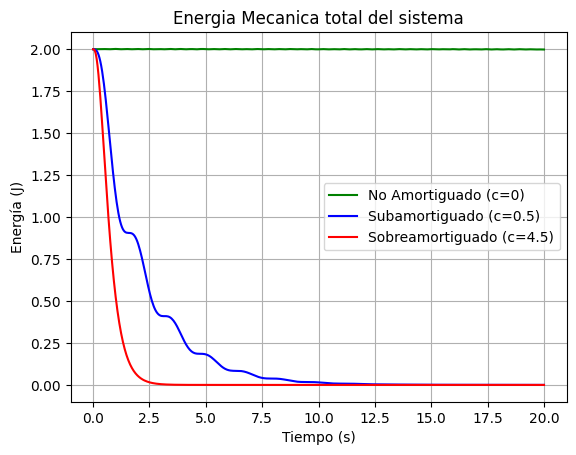

In [ ]:
# funcion para el calculo de la energia del sistema total
def calcular_energia(m, k, y, v):
    energia_cinetica = 0.5 * m * v**2
    energia_potencial = 0.5 * k * y**2
    return energia_cinetica + energia_potencial

# se calcula la energia para los tres casos
energia_sub = calcular_energia(m, k, sol_sub.y[0], sol_sub.y[1])
energia_no_amortiguado = calcular_energia(m, k, sol_no_amortiguado.y[0], sol_no_amortiguado.y[1])
energia_sobre = calcular_energia(m, k, sol_sobre.y[0], sol_sobre.y[1])

# graficacion de energia para cada caso
plt.plot(sol_no_amortiguado.t, energia_no_amortiguado, label='No Amortiguado (c=0)', color='green')
plt.plot(sol_sub.t, energia_sub, label='Subamortiguado (c=0.5)', color='blue')
plt.plot(sol_sobre.t, energia_sobre, label='Sobreamortiguado (c=4.5)', color='red')

plt.title('Energia Mecanica total del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.grid()
plt.show()

La energia total en el sistema se "pierde" mas rapido a mayor coeficiente de friccion


*   C = 0, no se disipa la energia, el sistema es conservativo
*   C = 0.5, la energia se disipa de forma rapida al inicio y despues de forma mas lenta conforme pasa el tiempo, se denotan valles, donde la energia permanece "igual" durante un corto periodo de tiempo, estos tiempos, comparando las graficas de posicion y de energia parece ser que suceden en lo picos de posicion.
*   C = 4.5, la energia se disipa casi toda en los primeros 2.5s de iniciado el movimiento.






# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [ ]:
# listas para almacenar las diferencias
det_diffs = []
trace_diffs = []
n = 5 #definimos tamaño de matriz
m = 1000  #numero de matrices deseado

for i in range(m):
  #definimos una matriz aleatoria n*n
  A = np.random.rand(n, n)

  # definimos los autovalores de la matriz A
  autovalores = np.linalg.eigvals(A)
  # definimos el determinante de A por libreria
  det_A = np.linalg.det(A)
  # definimos la traza de A por libreria
  tr_A = np.trace(A)

  # definimos traza y determinante por metodo de ecuaciones
  det_A_productoria = np.prod(autovalores)
  tr_A_sumatoria = np.sum(autovalores)

  #calculamos diferencias determinantes y trazas
  det_diffs.append(np.abs(det_A - det_A_productoria))
  trace_diffs.append(np.abs(tr_A - tr_A_sumatoria))

In [ ]:
# Imprimir los resultados de la verificación
print("verificacion numerica autovalores")
print(f"se probaron {m} matrices aleatorias de tamaño {n}x{n}.")

print("Propiedad del Determinante: det(A) = producto(λ_i)")
print(f"la maxima diferencia encontrada fue: {np.max(det_diffs):.2e}")

print("Propiedad de la Traza: tr(A) = suma(λ_i)")
print(f"la maxima diferencia encontrada fue: {np.max(trace_diffs):.2e}")

verificacion numerica autovalores
se probaron 1000 matrices aleatorias de tamaño 5x5.
Propiedad del Determinante: det(A) = producto(λ_i)
la maxima diferencia encontrada fue: 2.11e-15
Propiedad de la Traza: tr(A) = suma(λ_i)
la maxima diferencia encontrada fue: 7.99e-15
